In [1]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.insert(0, '../')

from TextLabeller import *

%matplotlib inline

In [2]:
from plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [3]:
def classify(x, y, train_test_ratio):

    x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = train_test_ratio)

    print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
    print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
    print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

    # Initialize classifier
#     rfc = RandomForestClassifier()
    from sklearn.naive_bayes import GaussianNB
    rfc = GaussianNB()

    # Train classifier
    model = rfc.fit(x_train, train_labels)

    # Make predictions
    y_preds = rfc.predict(test)

    # Evaluate model
    print(classification_report(test_labels, y_preds))
    print(accuracy_score(test_labels, y_preds))
    print(confusion_matrix(test_labels, y_preds))
    
    return test_labels, y_preds


# ROC Curve
def plot_roc_curve(test_labels, y_preds):
    fpr, tpr, threshold = roc_curve(test_labels, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

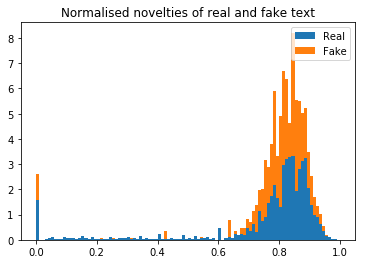

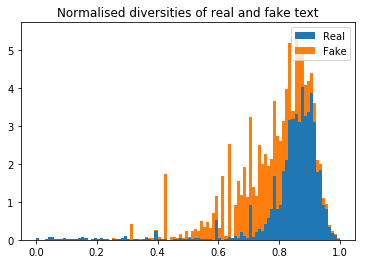

In [4]:
def normalize(distances):
    """
    """
    min_val, max_val = min(distances), max(distances)
    return [(val - 0) / (max_val - 0) for val in distances]

from utils import read_list, normal_distribution, get_scatter_plot, inverse_distances, normed_dists_to_sims

# Initial jaccard similarities
jac_real_diversities = read_list('jaccard_diversities_real.txt')
jac_real_novelties = read_list('jaccard_novelties_real.txt')
jac_fake_diversities = read_list('jaccard_diversities_fake3.txt')
jac_fake_novelties = read_list('jaccard_novelties_fake3.txt')

# Transform distances to similarities
jac_real_diversities = normalize(jac_real_diversities)
jac_real_novelties = normalize(jac_real_novelties)
jac_fake_diversities = normalize(jac_fake_diversities)
jac_fake_novelties = normalize(jac_fake_novelties)

def stacked_hist(data, name):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(name)
    plt.show()
    
def _stacked_hist(data):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
#     plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

# Novelties of real and fake text using jaccard similarity metric
jac_novs = combine_real_fake(jac_real_novelties, jac_fake_novelties)
stacked_hist(jac_novs, "Normalised novelties of real and fake text")

# Diversities of real and fake text using jaccard similarity metric
jac_divs = combine_real_fake(jac_real_diversities, jac_fake_diversities)
stacked_hist(jac_divs, "Normalised diversities of real and fake text")

[1 1 1 ... 0 0 0]


/Users/dc/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


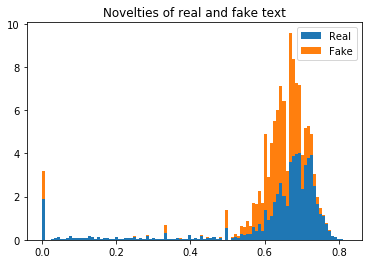

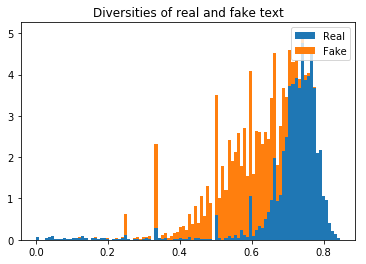

In [5]:
METRIC = "jaccard"

labelled_real=f'{METRIC}_labelled_real_text.csv'
labelled_fake=f'{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

combined_data = real_data.append(fake_data)

y = combined_data['label'].values
print(y)

csvjac_novs = combine_real_fake(real_data['novelty'], fake_data['novelty'])
stacked_hist(csvjac_novs, "Novelties of real and fake text")

csvjac_divs = combine_real_fake(real_data['diversity'], fake_data['diversity'])
stacked_hist(csvjac_divs, "Diversities of real and fake text")

## Classify using both novelty and diversity

input dimensions: 21554 | output dimensions: 21554
x_train dimensions: 19398 | y_train dimensions: 19398
x_test dimensions: 2156 | y_test dimensions: 2156
             precision    recall  f1-score   support

          0       0.87      0.83      0.85      1081
          1       0.84      0.88      0.86      1075

avg / total       0.86      0.86      0.86      2156

0.8562152133580705
[[902 179]
 [131 944]]


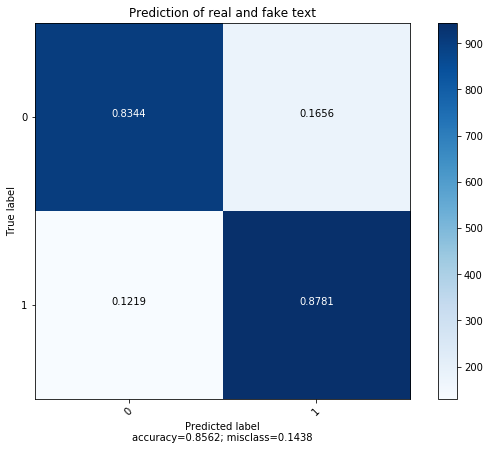

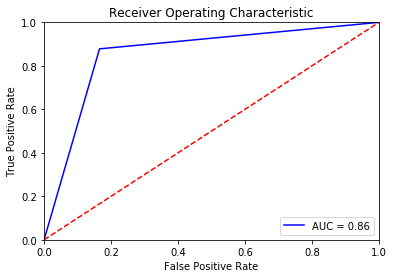

In [6]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

x = list()
for ix, nov in enumerate(novs):
    x.append([nov, divs[ix]])

test_labels, y_preds = classify(x, y, 0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

## Classify using only novelty

input dimensions: 21554 | output dimensions: 21554
x_train dimensions: 19398 | y_train dimensions: 19398
x_test dimensions: 2156 | y_test dimensions: 2156
             precision    recall  f1-score   support

          0       0.52      0.97      0.68      1060
          1       0.81      0.13      0.23      1096

avg / total       0.67      0.54      0.45      2156

0.5435992578849722
[[1027   33]
 [ 951  145]]


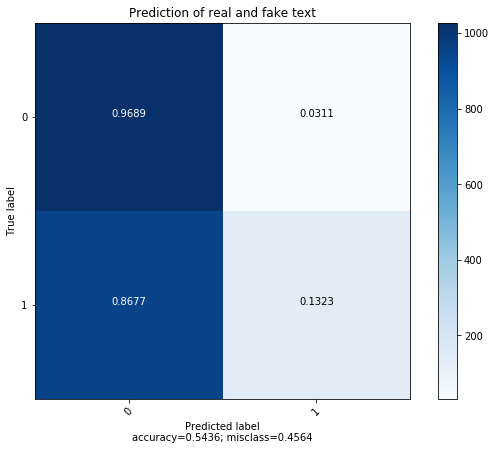

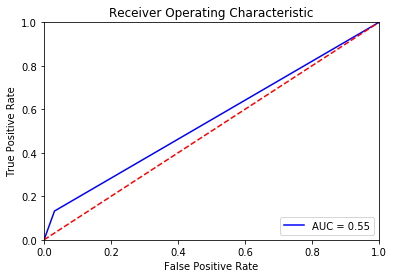

In [7]:
novs = combined_data['novelty'].values

x = list()
for ix, nov in enumerate(novs):
    x.append([nov])

test_labels, y_preds = classify(x, y, 0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

## Classify using only diversity

input dimensions: 21554 | output dimensions: 21554
x_train dimensions: 19398 | y_train dimensions: 19398
x_test dimensions: 2156 | y_test dimensions: 2156
             precision    recall  f1-score   support

          0       0.88      0.76      0.82      1087
          1       0.79      0.90      0.84      1069

avg / total       0.84      0.83      0.83      2156

0.8288497217068646
[[826 261]
 [108 961]]


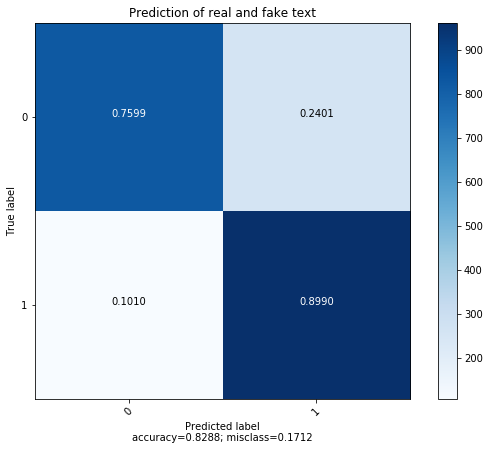

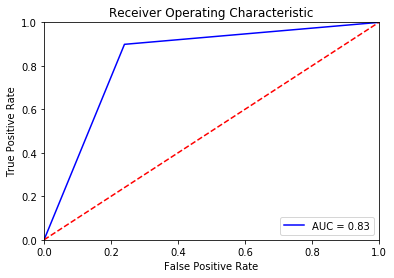

In [8]:
divs = combined_data['diversity'].values

x = list()
for ix, div in enumerate(divs):
    x.append([div])

test_labels, y_preds = classify(x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)